In [ ]:
#70% accuracy CNN model with CIFAR 10 data

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train) , (X_test , y_test) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 6s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

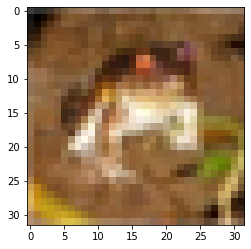

In [7]:
plt.imshow(X_train[0])

In [9]:
classes = ["Aeroplane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"] # All classes names

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2)) #Figure size
    plt.imshow(X[index]) #Figure
    plt.xlabel(classes[y[index]]) #Figure label 

In [13]:
y_test = y_test.reshape(-1,) #Converting 2d array to 1d array

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

TypeError: ignored

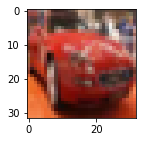

In [15]:
plot_sample(X_train, y_train, 5)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0 #normalization

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4473 - accuracy: 0.4823
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0922 - accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9659 - accuracy: 0.6619
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8785 - accuracy: 0.6940
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8099 - accuracy: 0.7200
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7573 - accuracy: 0.7352
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7080 - accuracy: 0.7505
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6638 - accuracy: 0.7678
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6197 - accuracy: 0.7825
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

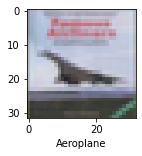

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
cnn.evaluate(X_test,y_test) #testing

313/313 [==============================] - 5s 15ms/step - loss: 0.9370 - accuracy: 0.6935


[0.9369807839393616, 0.6934999823570251]

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5] #probability disrtibution

array([[1.5427532e-03, 5.9784874e-05, 1.8287247e-02, 7.9453111e-01,
        1.1484192e-03, 1.4046034e-01, 4.2176630e-02, 2.7548868e-04,
        1.4866524e-03, 3.1461237e-05],
       [1.6376837e-03, 2.5726963e-02, 6.5564120e-07, 2.7544397e-07,
        3.5131981e-11, 2.5277939e-11, 1.0670306e-08, 6.7187994e-10,
        9.7257364e-01, 6.0766692e-05],
       [1.3398850e-02, 1.5072738e-02, 8.6297217e-04, 2.4598669e-03,
        3.0300583e-04, 3.0107951e-05, 1.3528172e-04, 6.7030900e-04,
        9.6403718e-01, 3.0296682e-03],
       [8.7032986e-01, 8.4483232e-03, 6.2143579e-03, 3.8116234e-03,
        3.4215560e-04, 3.1131211e-05, 7.1390456e-04, 2.3340595e-04,
        1.0841552e-01, 1.4597072e-03],
       [4.9561885e-07, 6.3670654e-05, 1.5000890e-02, 2.0340282e-02,
        3.5446223e-02, 4.9650471e-04, 9.2849183e-01, 4.4157437e-06,
        1.5412422e-04, 1.5754715e-06]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5] #predictions

[3, 8, 8, 0, 6]

In [30]:
y_test[:5] #actual sample

array([3, 8, 8, 0, 6], dtype=uint8)

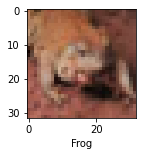

In [32]:
plot_sample(X_test, y_test,5) #Actual value

In [33]:

classes[y_classes[5]] # Predicted value

'Frog'